In [1]:
import preprocessing_main
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = preprocessing_main.getDf()

numerical_attributes = ["month_duration", "credit_amount", "installment_rate", "resident_since", "age",\
                        "credit_number", "people_liability"]
#added, easier for plotting
df_encode = df.copy()
for column in df.select_dtypes(include=['object']).columns:
    df_encode[column] = df[column].astype('category').cat.codes + 1
display(df_encode)
display(df)

,existing_account,month_duration,credit_history,purpose,credit_amount,saving_bonds,employment_status,installment_rate,status_sex,debts_status,...,property,age,installment_plans,housing_status,credit_number,job,people_liability,telephone,foreign,result
0,1,6,5,5,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,3,5,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,5,8,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,3,4,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,4,1,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,3,4,1736,1,4,3,2,1,...,1,31,3,2,1,2,1,1,1,1
996,1,30,3,2,3857,1,3,4,1,1,...,2,40,3,2,1,4,1,2,1,1
997,4,12,3,5,804,1,5,4,3,1,...,3,38,3,2,1,3,1,1,1,1
998,1,45,3,5,1845,1,3,4,3,1,...,4,23,3,3,1,3,1,2,1,2


,existing_account,month_duration,credit_history,purpose,credit_amount,saving_bonds,employment_status,installment_rate,status_sex,debts_status,...,property,age,installment_plans,housing_status,credit_number,job,people_liability,telephone,foreign,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# General Dataset Statistics

In [5]:
df.describe()

,month_duration,credit_amount,installment_rate,resident_since,age,credit_number,people_liability,result
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# General Eligible Dataset Statistics

In [6]:
eligible = df[df["result"] == 1].drop(columns=["result"])
eligible.describe()


,month_duration,credit_amount,installment_rate,resident_since,age,credit_number,people_liability
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# General Non-Eligible Dataset Statistics

In [7]:
not_eligible = df[df["result"] == 2].drop(columns=["result"])
not_eligible.describe()


,month_duration,credit_amount,installment_rate,resident_since,age,credit_number,people_liability
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000


We can note that the features "month_duration" and "credit_amount" are generally higher in the Non-Eligible entries in respect to the Eligible ones. In respect to the latter the 25% and 50% cuts are similar, while the situation drastically changes for the 75% cut.

# Target Distribution

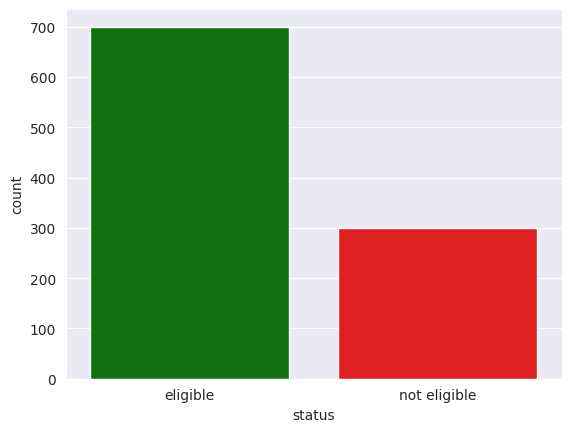

In [8]:
eligible["status"] = "eligible"
not_eligible["status"] = "not eligible"
combined_df = pd.concat([eligible, not_eligible])
sns.countplot(data=combined_df, x="status",palette={"eligible": "green", "not eligible": "red"})
eligible.drop(columns="status")
not_eligible.drop(columns="status")
plt.show()

Our Dataset is unbalanced: 70% of the entries are low risk loans, while the remaining are high risk loans. To deal with it we will stratify our training and test sets based on the "result" column for the Clustering. Similary, we will implement stratified k-fold crossvalidation for the Supervised Learning.

# Correlation Matrixes

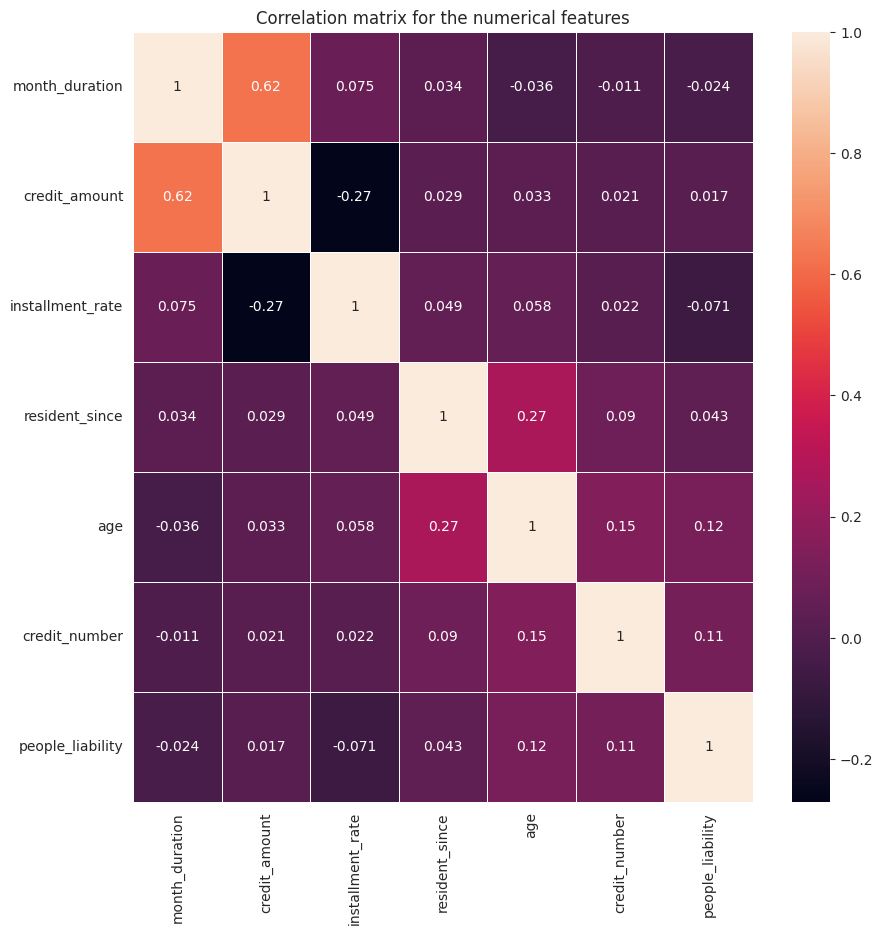

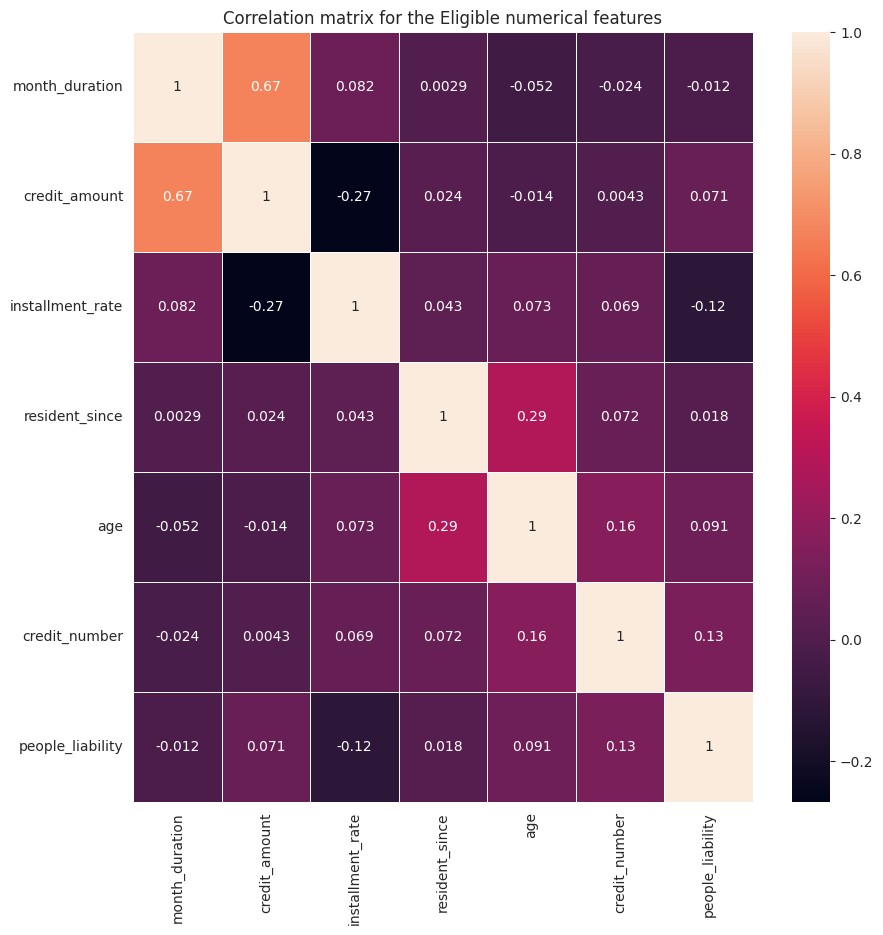

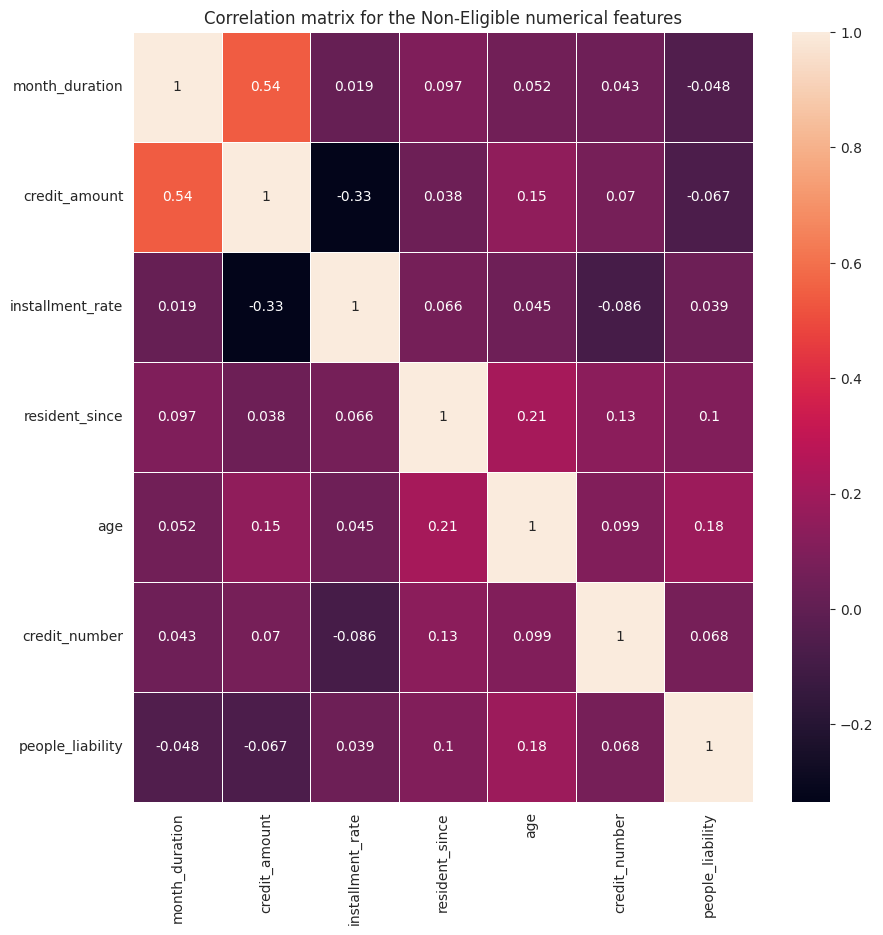

In [9]:
corr = df[numerical_attributes].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=numerical_attributes)
ax.set_yticklabels(labels=numerical_attributes, rotation=0)
ax.set_title("Correlation matrix for the numerical features")
plt.show()
eligible =df[df["result"] == 1 ]
corr = eligible[numerical_attributes].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=numerical_attributes)
ax.set_yticklabels(labels=numerical_attributes, rotation=0)
ax.set_title("Correlation matrix for the Eligible numerical features")
plt.show()
not_eligible =df[df["result"] == 2 ]
corr = not_eligible[numerical_attributes].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=numerical_attributes)
ax.set_yticklabels(labels=numerical_attributes, rotation=0)
ax.set_title("Correlation matrix for the Non-Eligible numerical features")
plt.show()

From the correlation matrix of the numerical attributes we can note that credit_amount and month_duration are the most correlated features. In addition no great differences are found between the correlation matrixes of Eligible and Non-Eligible entries.

# Sex Distribution

In [10]:

'''df_good = df[df["result"] == 1]
df_bad = df[df["result"] == 2]

plt.figure(figsize=(15,6))
g0 = sns.countplot(
        df["sex"], 
        color="Blue",
)
g0.set_title("Overall Sex Distribuition", fontsize=15)
g0.set_xlabel("Sex")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=3, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["sex"], 
        ax=axes[0], 
        color="green",
        bins = 50,
        label = 'Good credit'
)
g1 = sns.histplot(
        df_bad["sex"],
        ax=axes[0], 
        color='red',
        bins = 50,
        label = 'Bad credit'
)
axes[0].legend()

g1.set_title("Sex Distribuition By Result", fontsize=15)
g1.set_xlabel("Sex")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]'''


'df_good = df[df["result"] == 1]\ndf_bad = df[df["result"] == 2]\n\nplt.figure(figsize=(15,6))\ng0 = sns.countplot(\n        df["sex"], \n        color="Blue",\n)\ng0.set_title("Overall Sex Distribuition", fontsize=15)\ng0.set_xlabel("Sex")\ng0.set_ylabel("Count")\nplt.show()\n\nfig, axes = plt.subplots(nrows=3, figsize=(15,20))\nplt.subplots_adjust(hspace = 0.4, top = 0.8)\n\n\ng1 = sns.histplot(\n        df_good["sex"], \n        ax=axes[0], \n        color="green",\n        bins = 50,\n        label = \'Good credit\'\n)\ng1 = sns.histplot(\n        df_bad["sex"],\n        ax=axes[0], \n        color=\'red\',\n        bins = 50,\n        label = \'Bad credit\'\n)\naxes[0].legend()\n\ng1.set_title("Sex Distribuition By Result", fontsize=15)\ng1.set_xlabel("Sex")\ng1.set_ylabel("Count")\ncustom_palette = ["green", "red"]'

# Age Distribution

In [11]:
'''df_good = df.loc[df["result"] == 1]['age'].values.tolist()
df_bad = df.loc[df["result"] == 2]['age'].values.tolist()
df_age = df['age'].values.tolist()

fig, axes = plt.subplots(3,1, figsize=(8, 6))
fig.suptitle('Age Distribution')

# First plot
sns.histplot(
    data=df_good,
    ax= axes[0],
    stat='probability',
    label="Good Credit",
    color = "green",
    bins = 50
)

# Second plot
sns.histplot(
    data=df_bad,
    ax= axes[1],    
    stat='probability',
    label="Bad Credit",
    color = "red",
    bins = 50
)

# Third plot
sns.histplot(
    data=df_age,
    ax= axes[2],    
    stat='probability',
    label="Overall Age",
    color = "orange",
    bins = 50
)


# Creating the grid

fig.tight_layout(rect=[0, 0, 1, 0.95])
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Displaying the plot
plt.show()
'''

'df_good = df.loc[df["result"] == 1][\'age\'].values.tolist()\ndf_bad = df.loc[df["result"] == 2][\'age\'].values.tolist()\ndf_age = df[\'age\'].values.tolist()\n\nfig, axes = plt.subplots(3,1, figsize=(8, 6))\nfig.suptitle(\'Age Distribution\')\n\n# First plot\nsns.histplot(\n    data=df_good,\n    ax= axes[0],\n    stat=\'probability\',\n    label="Good Credit",\n    color = "green",\n    bins = 50\n)\n\n# Second plot\nsns.histplot(\n    data=df_bad,\n    ax= axes[1],    \n    stat=\'probability\',\n    label="Bad Credit",\n    color = "red",\n    bins = 50\n)\n\n# Third plot\nsns.histplot(\n    data=df_age,\n    ax= axes[2],    \n    stat=\'probability\',\n    label="Overall Age",\n    color = "orange",\n    bins = 50\n)\n\n\n# Creating the grid\n\nfig.tight_layout(rect=[0, 0, 1, 0.95])\naxes[0].legend()\naxes[1].legend()\naxes[2].legend()\n\n# Displaying the plot\nplt.show()\n'

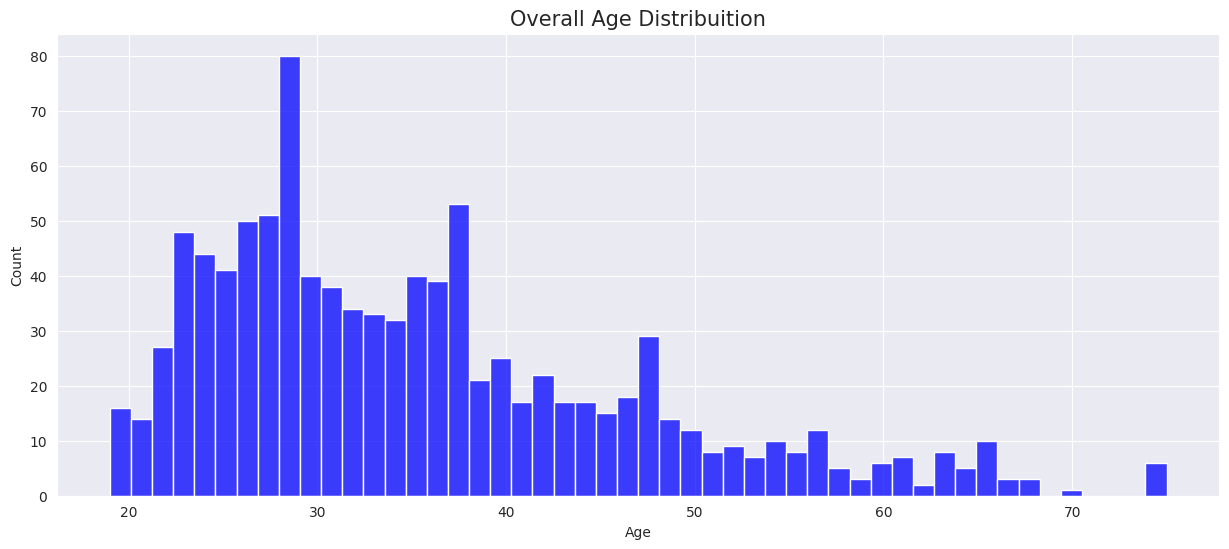

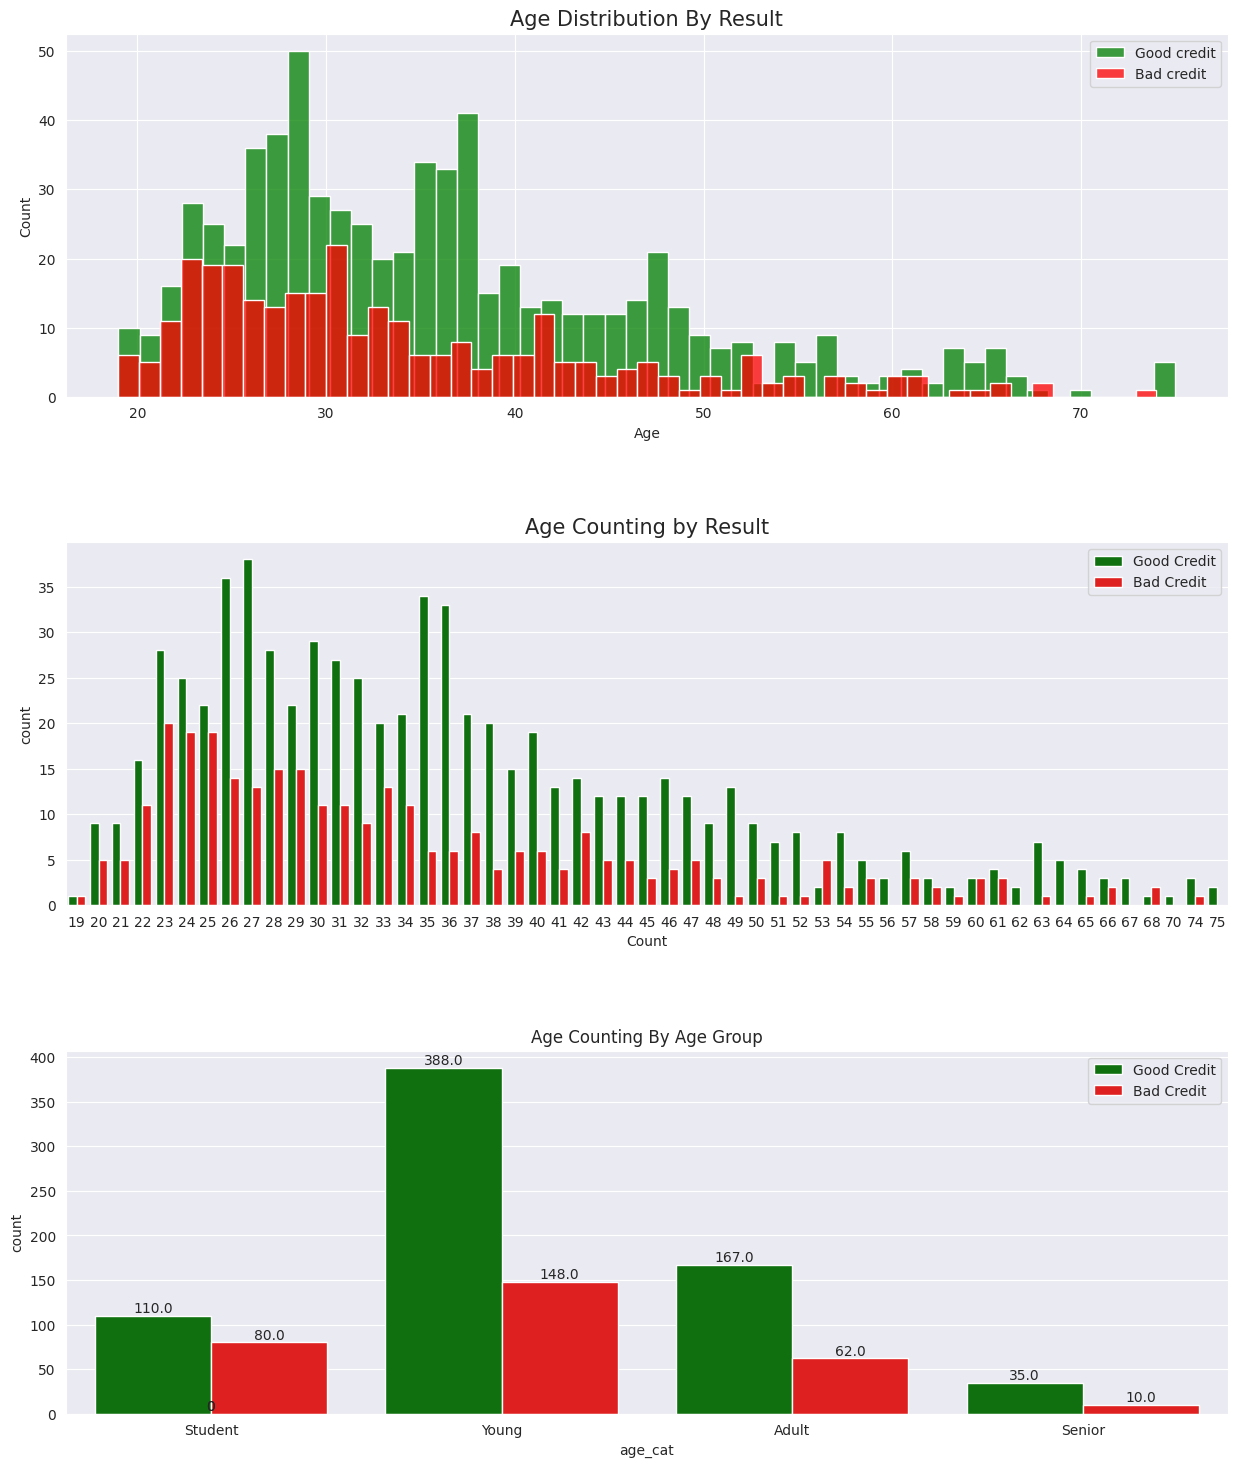

% Ratio Student Category: 58%
% Ratio Young Category: 72%
% Ratio Adult Category: 73%
% Ratio Senior Category: 78%


In [12]:
interval = (18, 25, 40, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df["age_cat"] = pd.cut(df.age, interval, labels=cats)

df_good = df[df["result"] == 1]
df_bad = df[df["result"] == 2]
plt.figure(figsize=(15,6))
g0 = sns.histplot(
        df["age"], 
        color="Blue",
        bins = 50,
)
g0.set_title("Overall Age Distribuition", fontsize=15)
g0.set_xlabel("Age")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=3, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["age"], 
        ax=axes[0], 
        color="green",
        bins = 50,
        label = 'Good credit'
)
g1 = sns.histplot(
        df_bad["age"],
        ax=axes[0], 
        color='red',
        bins = 50,
        label = 'Bad credit'
)
axes[0].legend()

g1.set_title("Age Distribution By Result", fontsize=15)
g1.set_xlabel("Age")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]
g2 = sns.countplot(
    x="age",
    data=df, 
    ax=axes[1], 
    palette=custom_palette,
    hue = "result"
)

g2.set_title("Age Counting by Result", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
g2.legend(labels=["Good Credit", "Bad Credit"])

g3 = sns.countplot(
    data = df,
    x = "age_cat",
    ax=axes[2], 
    palette=custom_palette,
    hue = 'result'
)

list_height = []
for bar in g3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    list_height.append(y)
    g3.annotate(f'{y}', (x, y), ha='center', va='bottom')

g3.legend(labels=["Good Credit", "Bad Credit"])
g3.set_title("Age Counting By Age Group")
g2.set_xlabel("Age category")
g2.set_xlabel("Count")
plt.show()
res = []
for i in range(4):
    res = list_height[i]/(list_height[i]+list_height[i+4])*100
    print(f"% Ratio {cats[i]} Category: {round(res)}%")


In the last plot by feature engineering all the dataset entries into 4 different groups: Student, Young, Adult and Senior based on their age, we delve into studying if the age group could matter in the outcome of the credit.
As the ratios show it seems that in Student group, aged from 18 to 25, it's more likely to encounter a bad credit in respect to the 70 / 30 general split of the dataset. On the other hand for the Senior category (age greater equal than 60) a positive outcome is more probable. Additionally, the ratio seems increasing with the increasing of the age group. Therefore a question arouses:

- Could it be that older people by possessing more money or having a more stable, senior job in comparison than students are more likely to be good creditors? Or also the fact that some of them may already possess housing...

To reply to this question we will delve into studying if the age is moderated by other variables such as existing_account, saving_bonds, job, housing_status

# Duration

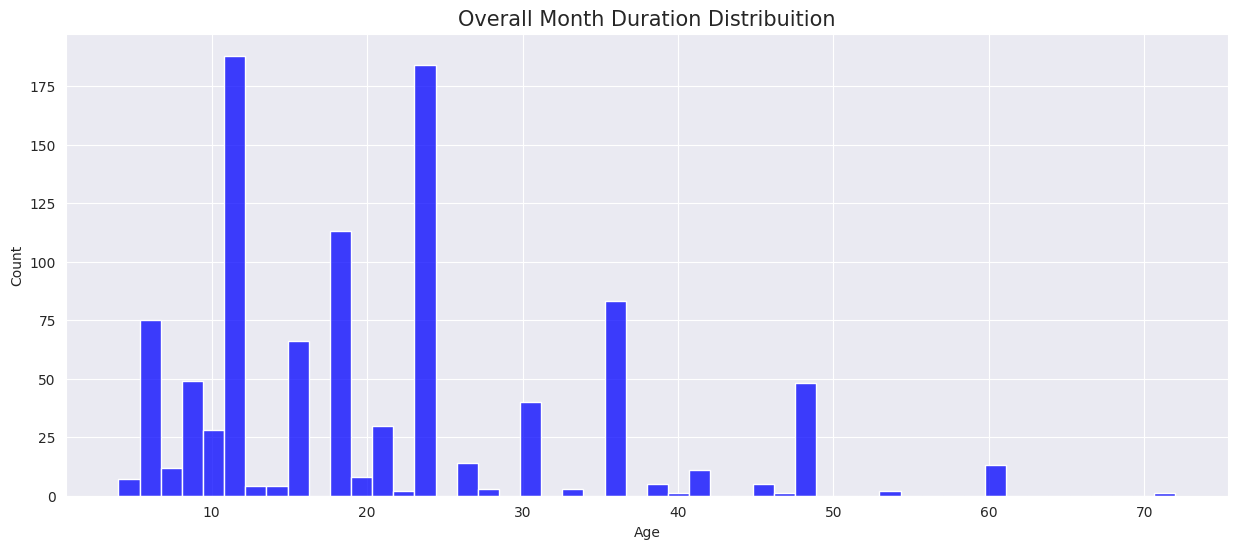

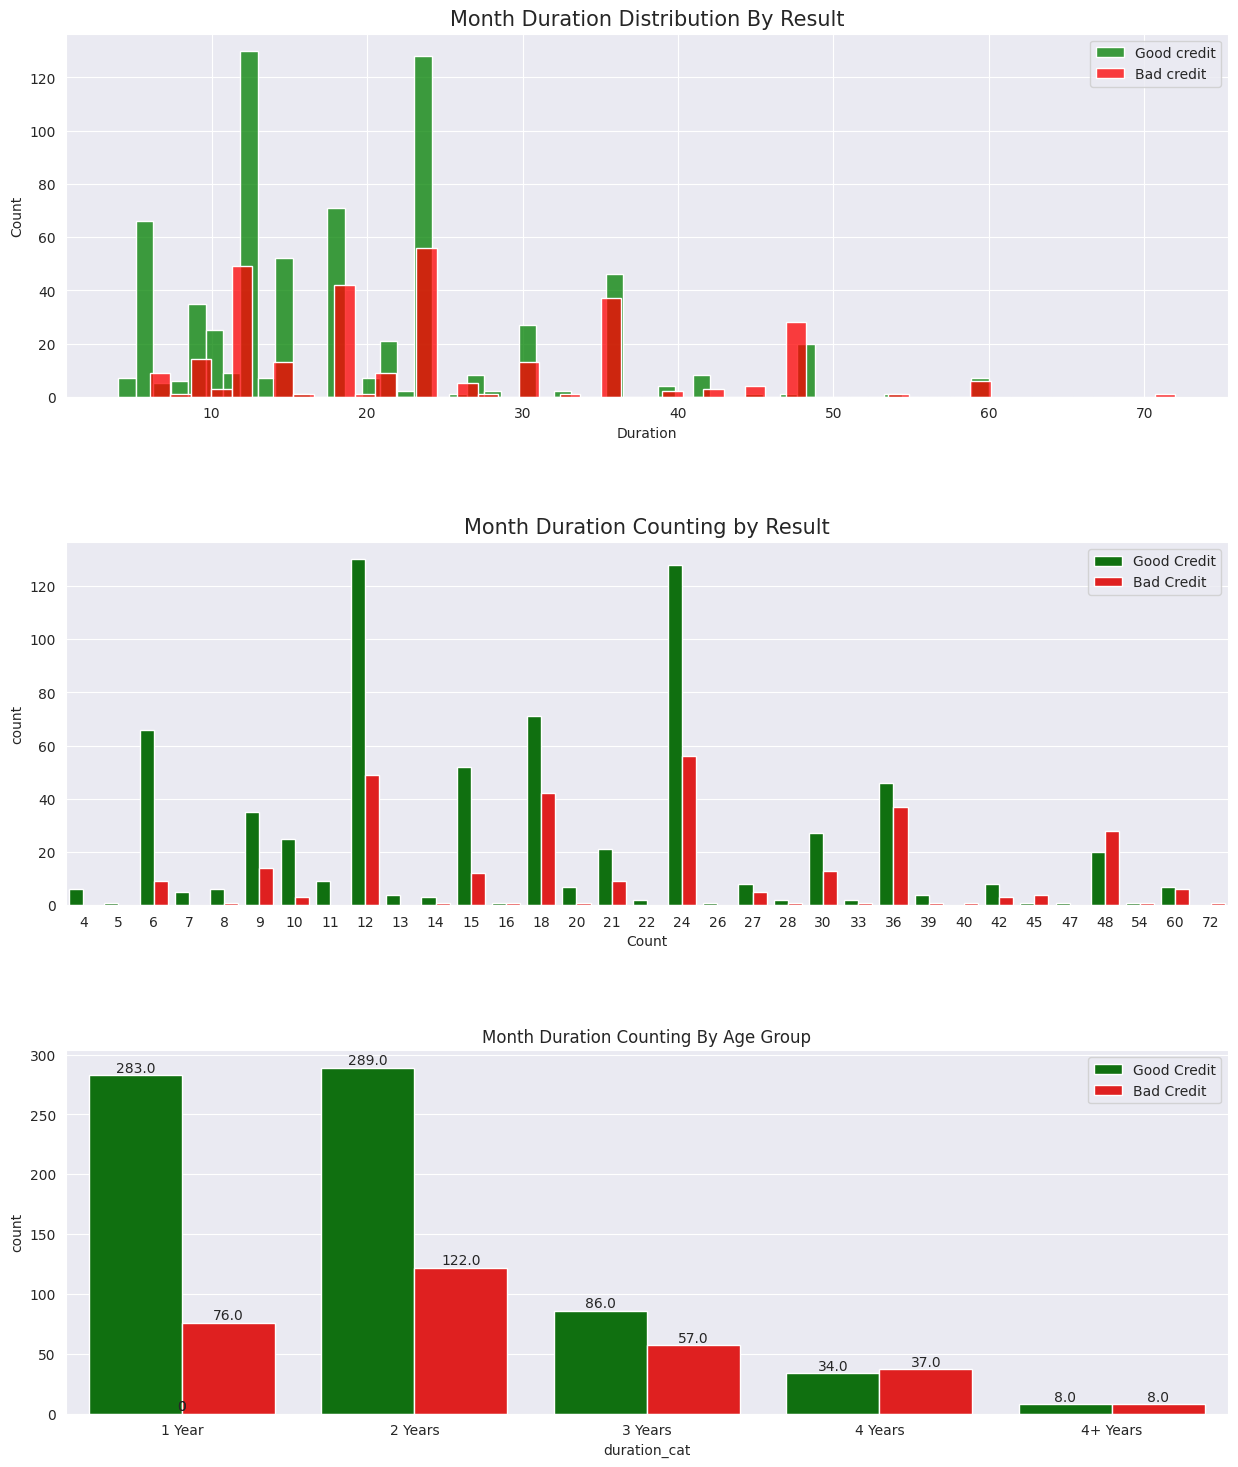

% Ratio 1 Year Category: 79%
% Ratio 2 Years Category: 70%
% Ratio 3 Years Category: 60%
% Ratio 4 Years Category: 48%
% Ratio 4+ Years Category: 50%


In [13]:
interval = (0,12, 24, 36, 48, 100)
cats = ['1 Year', '2 Years', '3 Years', '4 Years','4+ Years']
df["duration_cat"] = pd.cut(df.month_duration, interval, labels=cats)

plt.figure(figsize=(15,6))
g0 = sns.histplot(
        df["month_duration"], 
        color="Blue",
        bins = 50,
)
g0.set_title("Overall Month Duration Distribuition", fontsize=15)
g0.set_xlabel("Age")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=3, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["month_duration"], 
        ax=axes[0], 
        color="green",
        bins=50,
        label = 'Good credit'
)
g1 = sns.histplot(
        df_bad["month_duration"],
        ax=axes[0], 
        color='red',
        bins=50,
        label = 'Bad credit'
)
axes[0].legend()

g1.set_title("Month Duration Distribution By Result", fontsize=15)
g1.set_xlabel("Duration")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]
g2 = sns.countplot(
    x="month_duration",
    data=df, 
    ax=axes[1], 
    palette=custom_palette,
    hue = "result"
)

g2.set_title("Month Duration Counting by Result", fontsize=15)
g2.set_xlabel("Duration")
g2.set_xlabel("Count")
g2.legend(labels=["Good Credit", "Bad Credit"])

g3 = sns.countplot(
    data = df,
    x = "duration_cat",
    ax=axes[2], 
    palette=custom_palette,
    hue = 'result'
)

list_height = []
for bar in g3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    list_height.append(y)
    g3.annotate(f'{y}', (x, y), ha='center', va='bottom')

g3.legend(labels=["Good Credit", "Bad Credit"])
g3.set_title("Month Duration Counting By Age Group")
g2.set_xlabel("Duration")
g2.set_xlabel("Count")
plt.show()
res = []
for i in range(5):
    res = list_height[i]/(list_height[i]+list_height[i+5])*100
    print(f"% Ratio {cats[i]} Category: {round(res)}%")


# Credit Amount

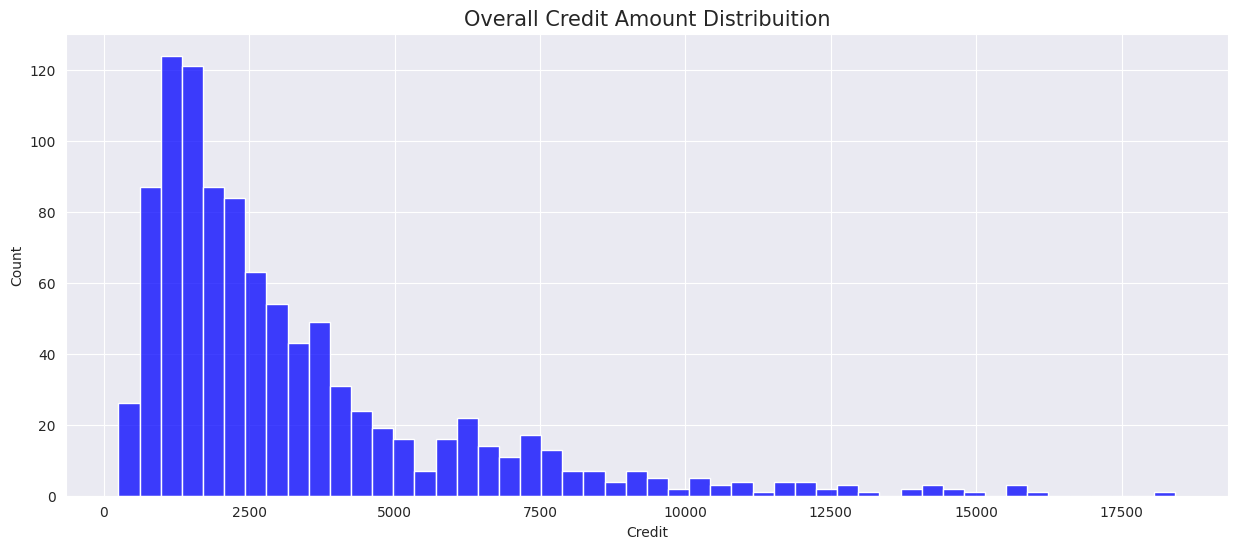

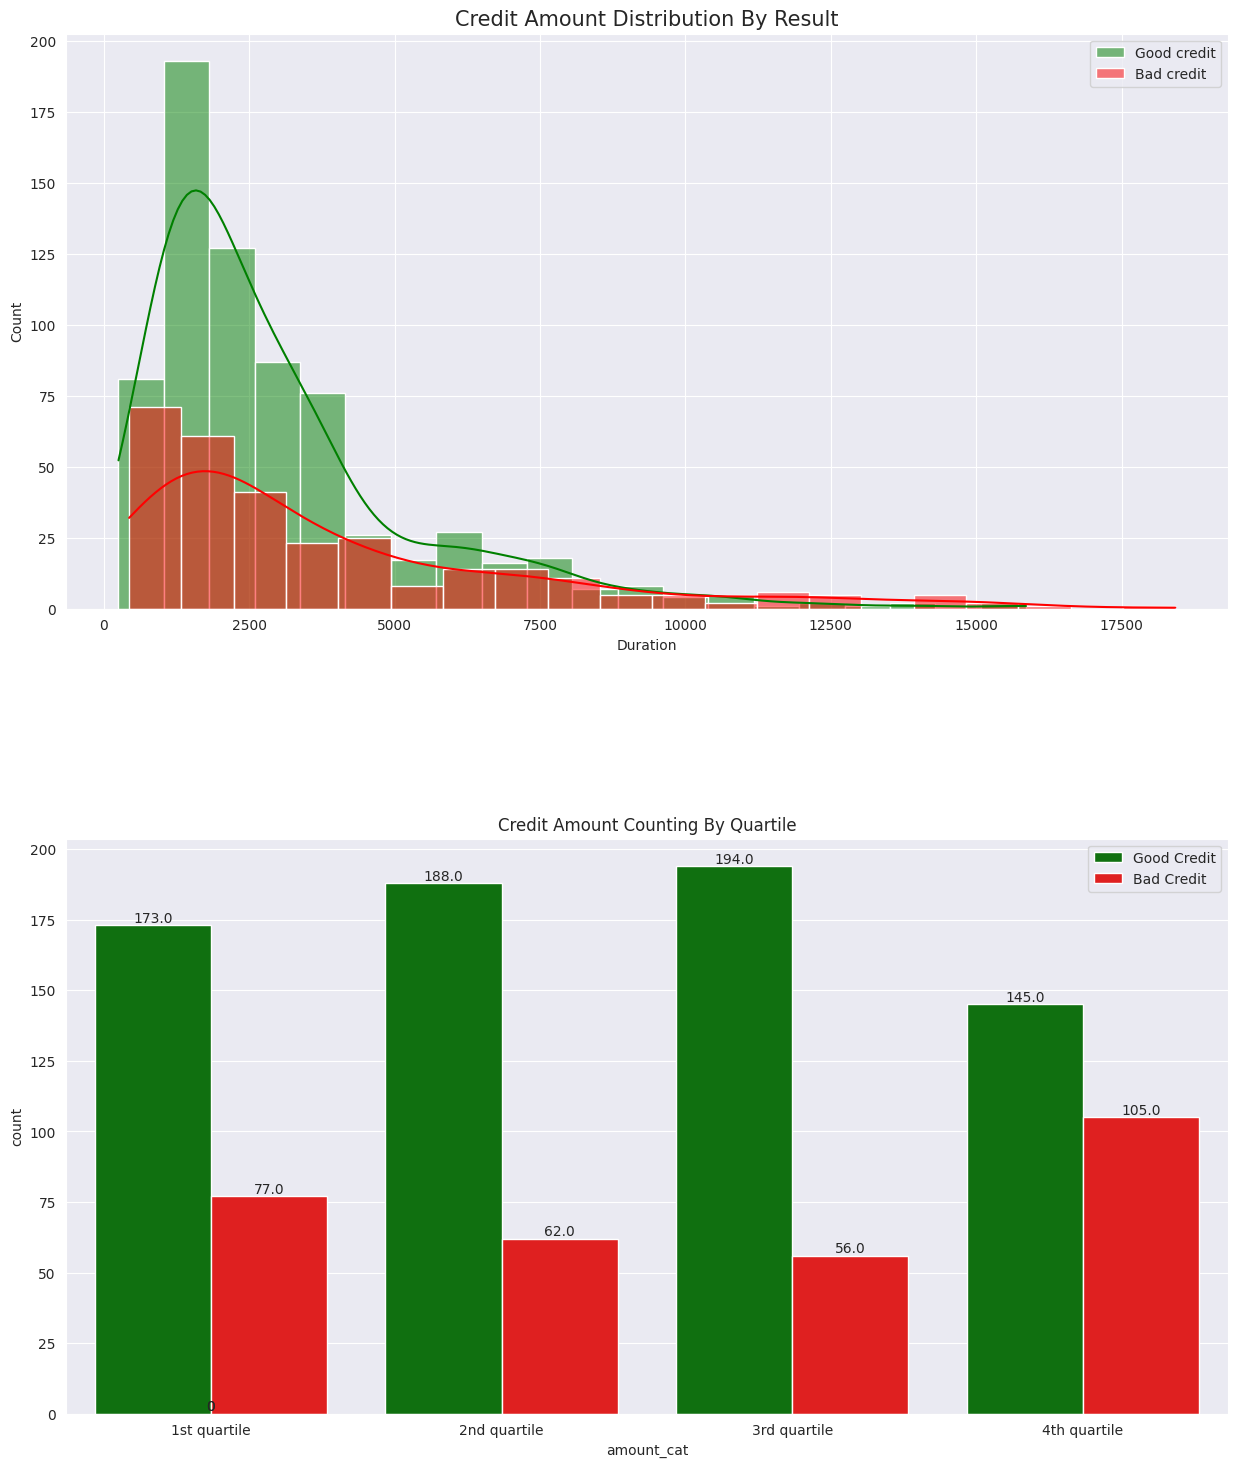

% Ratio 1st quartile Category: 69%
% Ratio 2nd quartile Category: 75%
% Ratio 3rd quartile Category: 78%
% Ratio 4th quartile Category: 58%


In [14]:
interval = (0,1365.5,2319.5, 3972.25, 20000)
cats = ['1st quartile', '2nd quartile', '3rd quartile', '4th quartile']
df["amount_cat"] = pd.cut(df.credit_amount, interval, labels=cats)

plt.figure(figsize=(15,6))
g0 = sns.histplot(
        df["credit_amount"], 
        color="Blue",
        bins = 50,
)
g0.set_title("Overall Credit Amount Distribuition", fontsize=15)
g0.set_xlabel("Credit")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=2, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["credit_amount"], 
        ax=axes[0], 
        color="green",
        bins=20,
        label = 'Good credit',
        kde=True
)
g1 = sns.histplot(
        df_bad["credit_amount"],
        ax=axes[0], 
        color='red',
        bins=20,
        label = 'Bad credit',
        kde=True
)
axes[0].legend()

g1.set_title("Credit Amount Distribution By Result", fontsize=15)
g1.set_xlabel("Duration")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]
'''g2 = sns.countplot(
    x="credit_amount",
    data=df, 
    ax=axes[1], 
    palette=custom_palette,
    hue = "result"
)
'''
g2.set_title("Credit Amount Counting by Result", fontsize=15)
g2.set_xlabel("Amount")
g2.set_xlabel("Count")
g2.legend(labels=["Good Credit", "Bad Credit"])

g3 = sns.countplot(
    data = df,
    x = "amount_cat",
    ax=axes[1], 
    palette=custom_palette,
    hue = 'result'
)

list_height = []
for bar in g3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    list_height.append(y)
    g3.annotate(f'{y}', (x, y), ha='center', va='bottom')

g3.legend(labels=["Good Credit", "Bad Credit"])
g3.set_title("Credit Amount Counting By Quartile")
plt.show()
res = []
for i in range(4):
    res = list_height[i]/(list_height[i]+list_height[i+4])*100
    print(f"% Ratio {cats[i]} Category: {round(res)}%")


# Installment Rate


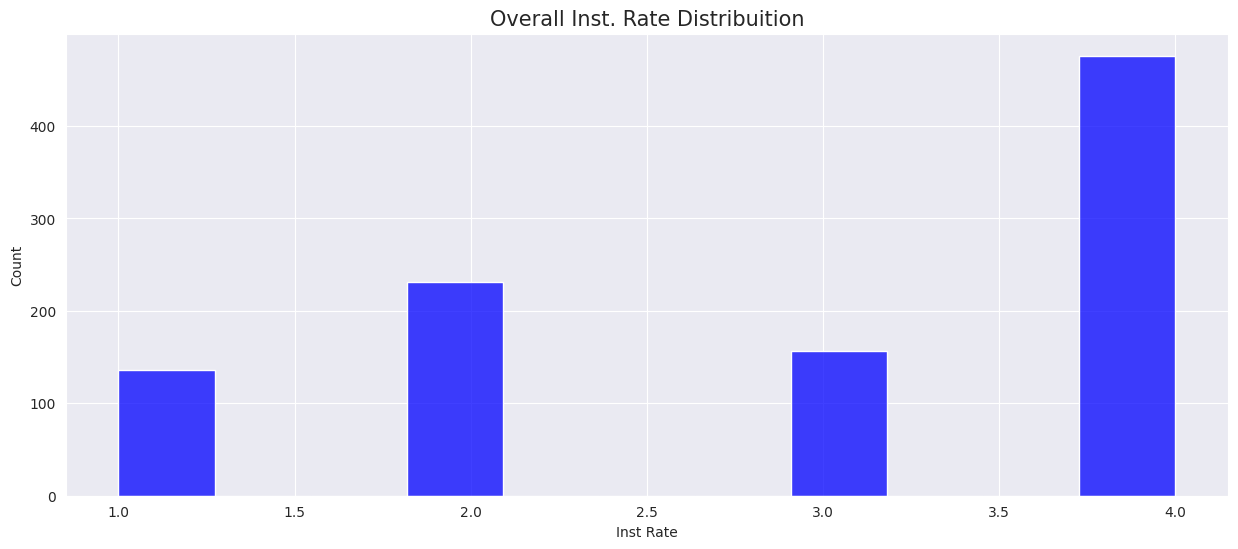

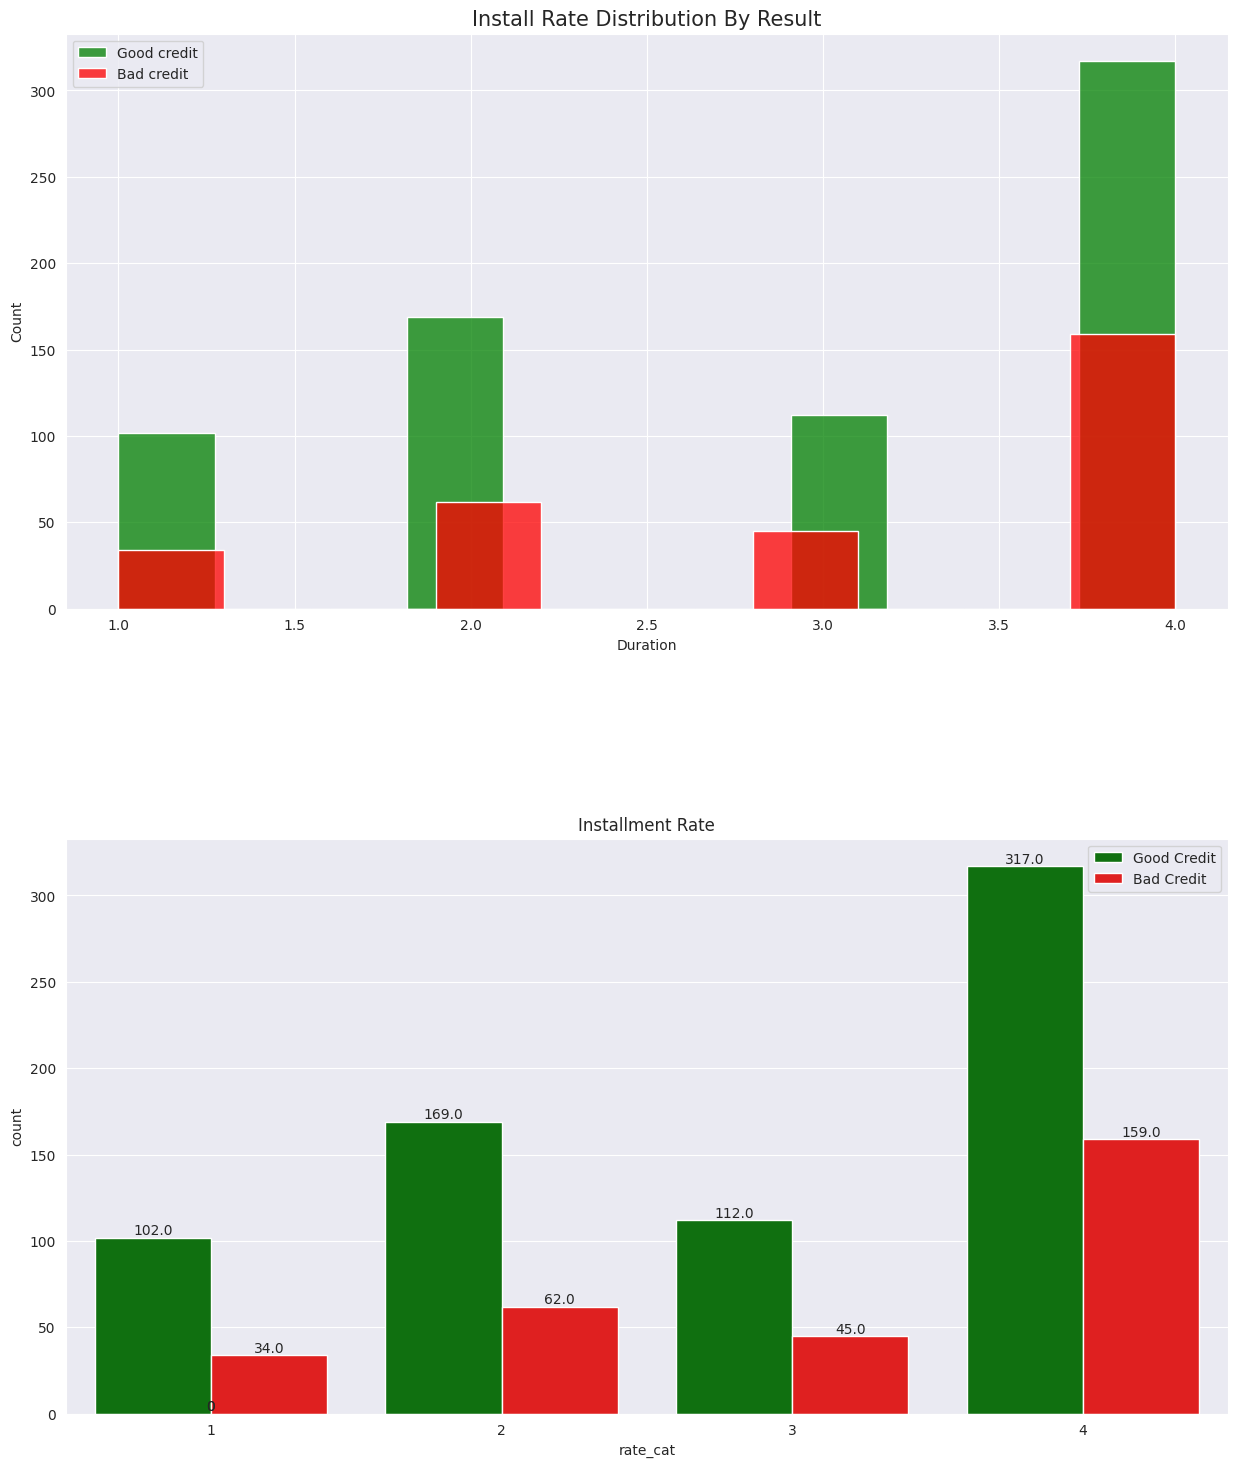

% Ratio 1 Category: 75%
% Ratio 2 Category: 73%
% Ratio 3 Category: 71%
% Ratio 4 Category: 67%


In [15]:
interval = (0,1,2, 3, 4)
cats = ['1', '2', '3', '4']
df["rate_cat"] = pd.cut(df.installment_rate, interval, labels=cats)

plt.figure(figsize=(15,6))
g0 = sns.histplot(
        df["installment_rate"], 
        color="Blue",
)
g0.set_title("Overall Inst. Rate Distribuition", fontsize=15)
g0.set_xlabel("Inst Rate")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=2, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["installment_rate"], 
        ax=axes[0], 
        color="green",
        label = 'Good credit'
)
g1 = sns.histplot(
        df_bad["installment_rate"],
        ax=axes[0], 
        color='red',
        label = 'Bad credit'
)
axes[0].legend()

g1.set_title("Install Rate Distribution By Result", fontsize=15)
g1.set_xlabel("Duration")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]
'''g2 = sns.countplot(
    x="credit_amount",
    data=df, 
    ax=axes[1], 
    palette=custom_palette,
    hue = "result"
)
'''
g2.set_title("Credit Amount Counting by Result", fontsize=15)
g2.set_xlabel("Amount")
g2.set_xlabel("Count")
g2.legend(labels=["Good Credit", "Bad Credit"])

g3 = sns.countplot(
    data = df,
    x = "rate_cat",
    ax=axes[1], 
    palette=custom_palette,
    hue = 'result'
)

list_height = []
for bar in g3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    list_height.append(y)
    g3.annotate(f'{y}', (x, y), ha='center', va='bottom')

g3.legend(labels=["Good Credit", "Bad Credit"])
g3.set_title("Installment Rate")
plt.show()
res = []
for i in range(4):
    res = list_height[i]/(list_height[i]+list_height[i+4])*100
    print(f"% Ratio {cats[i]} Category: {round(res)}%")


# Credit Number

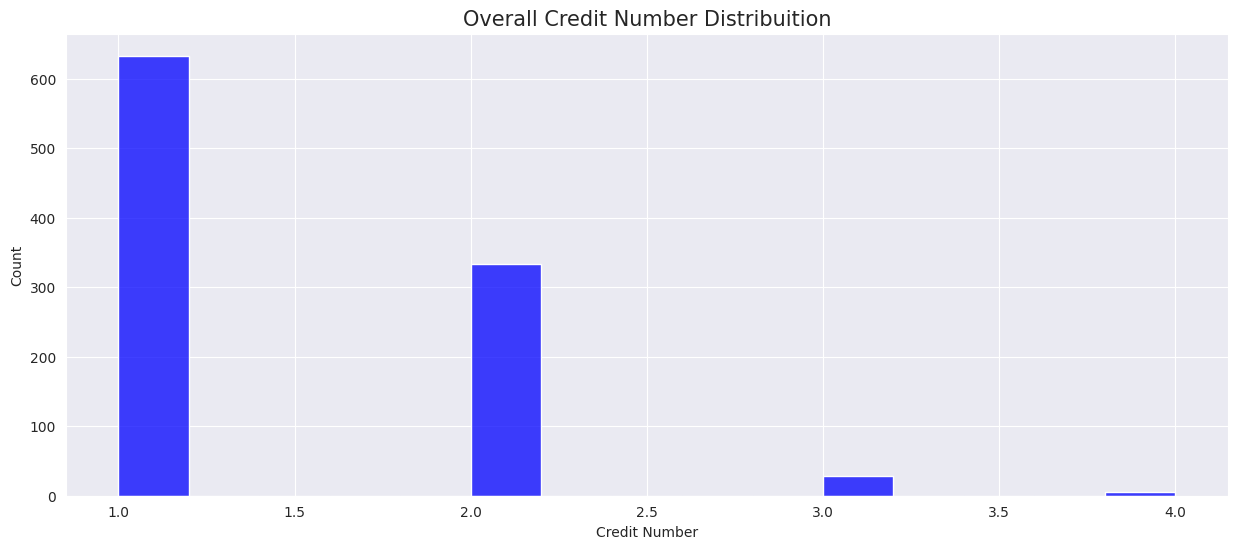

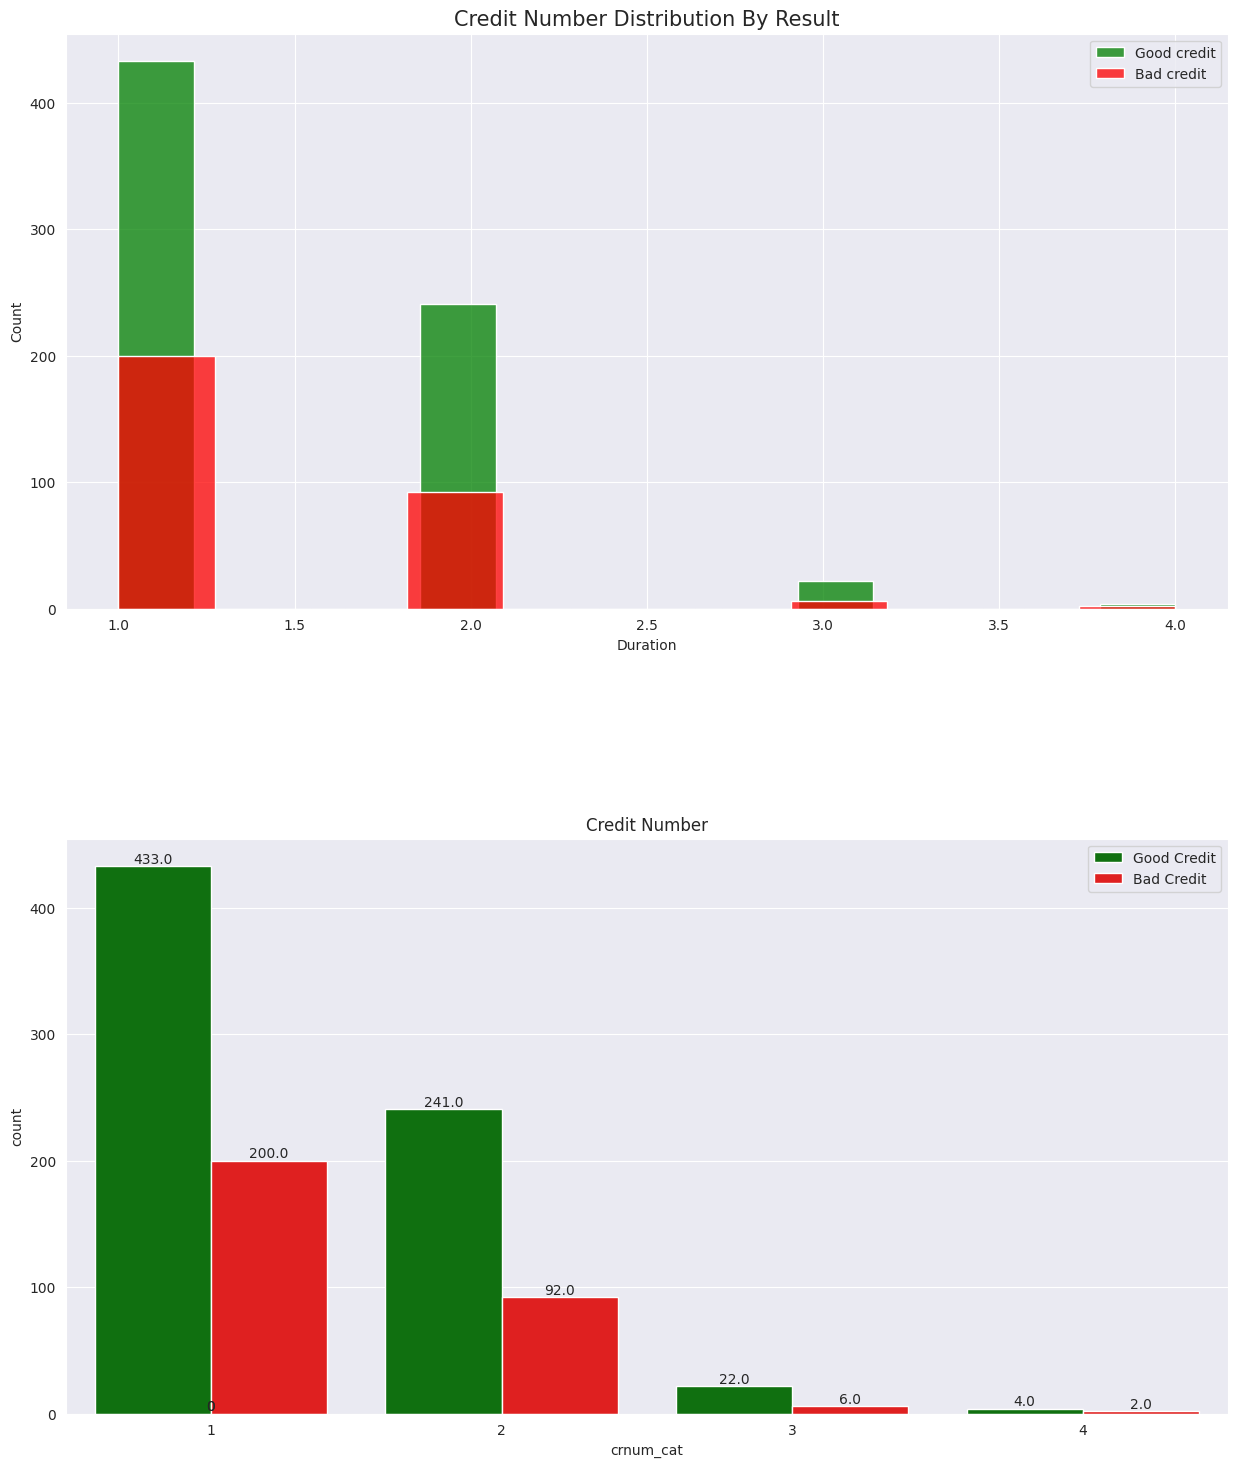

% Ratio 1 Category: 68%
% Ratio 2 Category: 72%
% Ratio 3 Category: 79%
% Ratio 4 Category: 67%


In [16]:
interval = (0,1,2, 3, 4)
cats = ['1', '2', '3', '4']
df["crnum_cat"] = pd.cut(df.credit_number, interval, labels=cats)

plt.figure(figsize=(15,6))
g0 = sns.histplot(
        df["credit_number"], 
        color="Blue",
)
g0.set_title("Overall Credit Number Distribuition", fontsize=15)
g0.set_xlabel("Credit Number")
g0.set_ylabel("Count")
plt.show()

fig, axes = plt.subplots(nrows=2, figsize=(15,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


g1 = sns.histplot(
        df_good["credit_number"], 
        ax=axes[0], 
        color="green",
        label = 'Good credit'
)
g1 = sns.histplot(
        df_bad["credit_number"],
        ax=axes[0], 
        color='red',
        label = 'Bad credit'
)
axes[0].legend()

g1.set_title("Credit Number Distribution By Result", fontsize=15)
g1.set_xlabel("Duration")
g1.set_ylabel("Count")
custom_palette = ["green", "red"]
'''g2 = sns.countplot(
    x="credit_amount",
    data=df, 
    ax=axes[1], 
    palette=custom_palette,
    hue = "result"
)
'''
g2.set_title("Credit Number Counting by Result", fontsize=15)
g2.set_xlabel("Amount")
g2.set_xlabel("Count")
g2.legend(labels=["Good Credit", "Bad Credit"])

g3 = sns.countplot(
    data = df,
    x = "crnum_cat",
    ax=axes[1], 
    palette=custom_palette,
    hue = 'result'
)

list_height = []
for bar in g3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    list_height.append(y)
    g3.annotate(f'{y}', (x, y), ha='center', va='bottom')

g3.legend(labels=["Good Credit", "Bad Credit"])
g3.set_title("Credit Number")
plt.show()
res = []
for i in range(4):
    res = list_height[i]/(list_height[i]+list_height[i+4])*100
    print(f"% Ratio {cats[i]} Category: {round(res)}%")


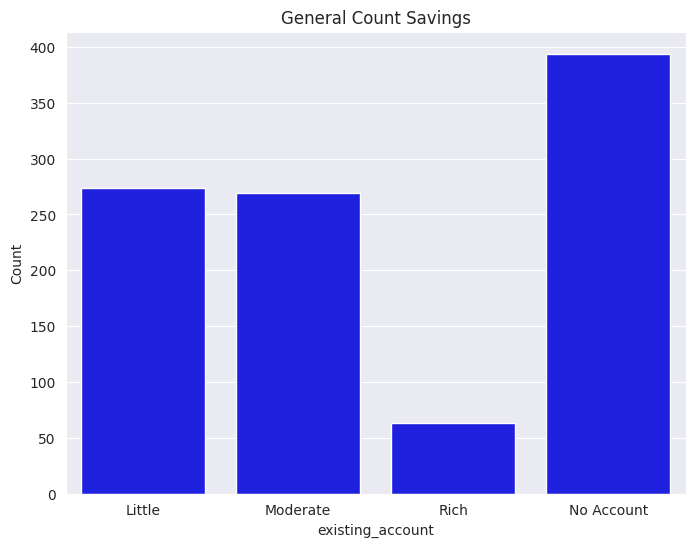

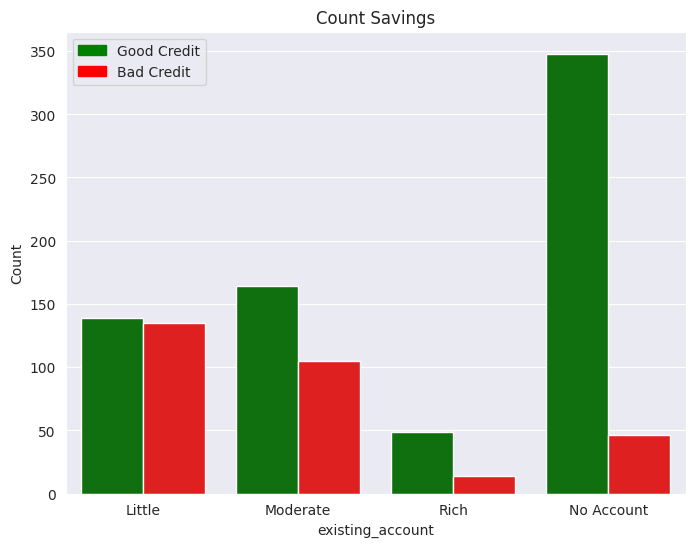

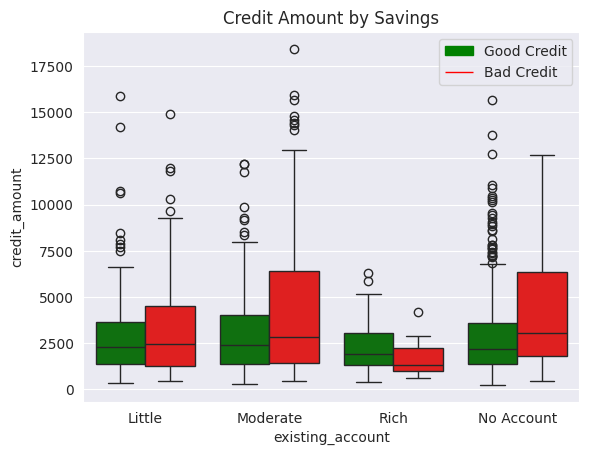

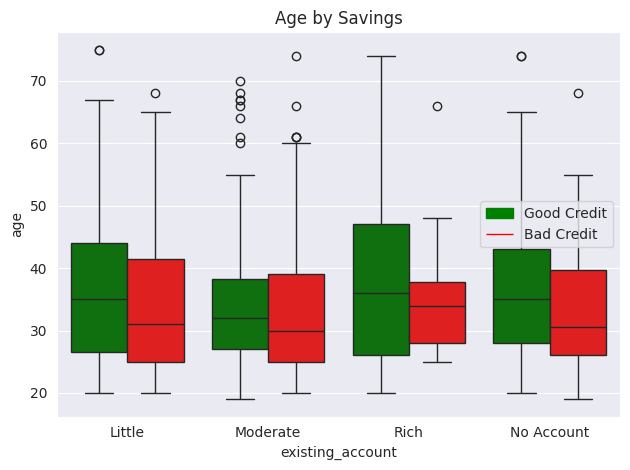

In [29]:
plt.figure(figsize=(8, 6))
ticks = ["Little","Moderate","Rich","No Account"]
sns.countplot(x="existing_account",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3],ticks)
plt.title('General Count Savings')
plt.show()
plt.figure(figsize=(8, 6))
ticks = ["Little","Moderate","Rich","No Account"]
sns.countplot(x="existing_account",data=df_encode, hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3],ticks)
plt.title('Count Savings')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()

# Create the boxplot for Credit Amount by Savings Account
sns.boxplot(x="existing_account", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3],ticks)
plt.title('Credit Amount by Savings')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Age by Savings Account

sns.boxplot(x="existing_account", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3],ticks)
plt.title('Age by Savings')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

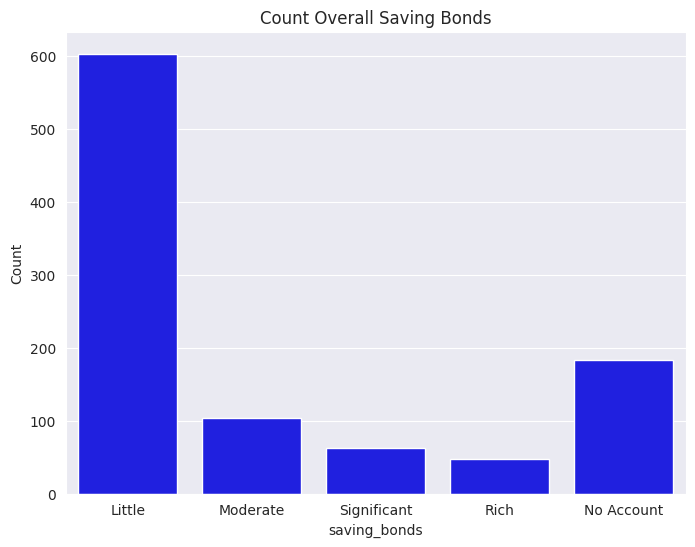

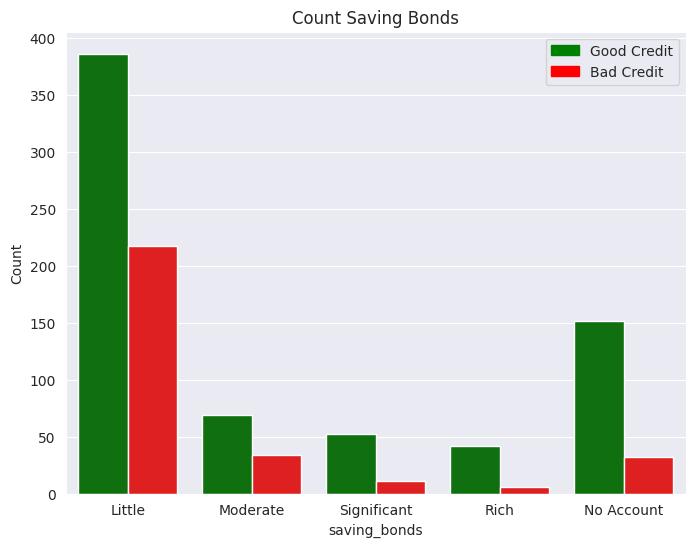

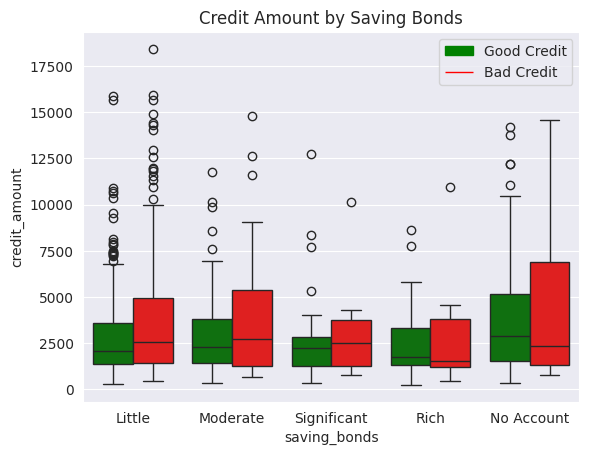

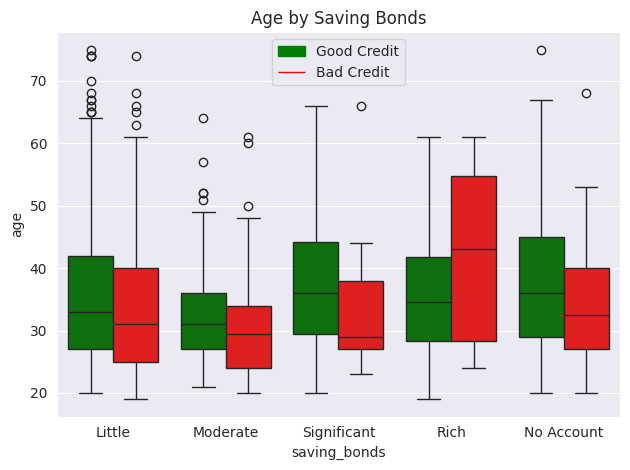

In [18]:
plt.figure(figsize=(8, 6))
ticks = ["Little","Moderate","Significant","Rich","No Account"]
sns.countplot(x="saving_bonds",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Count Overall Saving Bonds')
plt.show()

plt.figure(figsize=(8, 6))
ticks = ["Little","Moderate","Significant","Rich","No Account"]
sns.countplot(x="saving_bonds",data=df_encode, hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Count Saving Bonds')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()

# Create the boxplot for Credit Amount by Savings Account
sns.boxplot(x="saving_bonds", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Credit Amount by Saving Bonds')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Age by Savings Account

sns.boxplot(x="saving_bonds", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Age by Saving Bonds')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

In [19]:

'''sns.boxplot(x="existing_account", y="credit_amount", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3],ticks)
plt.title('Credit Amount by Savings')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()'''

'sns.boxplot(x="existing_account", y="credit_amount", data=df_encode, hue="result",palette=custom_palette)\nplt.xticks([0,1,2,3],ticks)\nplt.title(\'Credit Amount by Savings\')\n\n# Adjust the layout\nplt.tight_layout()\ncustom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])\ncustom_legend.legendHandles[0].set_color("green")\ncustom_legend.legendHandles[1].set_color("red")\n# Show the plots\nplt.show()'

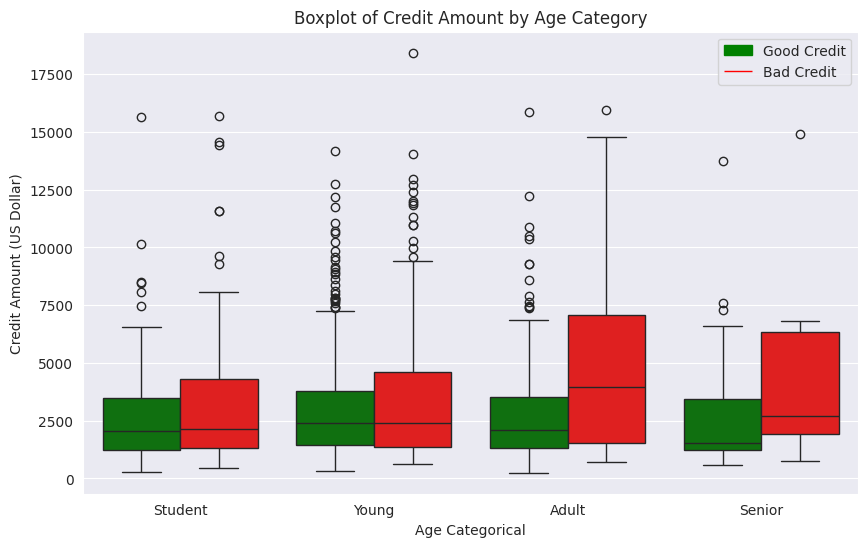

In [20]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="age_cat", y="credit_amount", hue="result", data=df, palette=custom_palette)
plt.xlabel('Age Categorical')
plt.ylabel('Credit Amount (US Dollar)')
plt.title('Boxplot of Credit Amount by Age Category')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()

We can note how good credits seem to have similar credit amount distribution across all age classes, while bad credits have a different distribution in the Adult and Senior classes related to Student and Young classes. This means that the bank is generally more willing to offer higher credit amounts to older people.

# Job

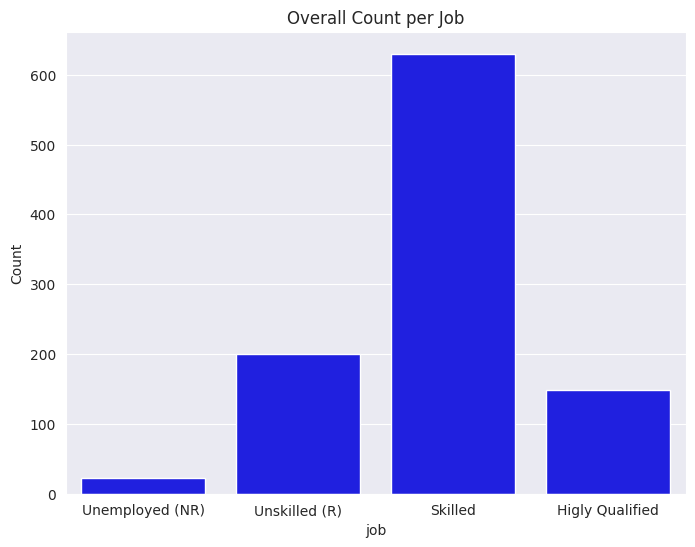

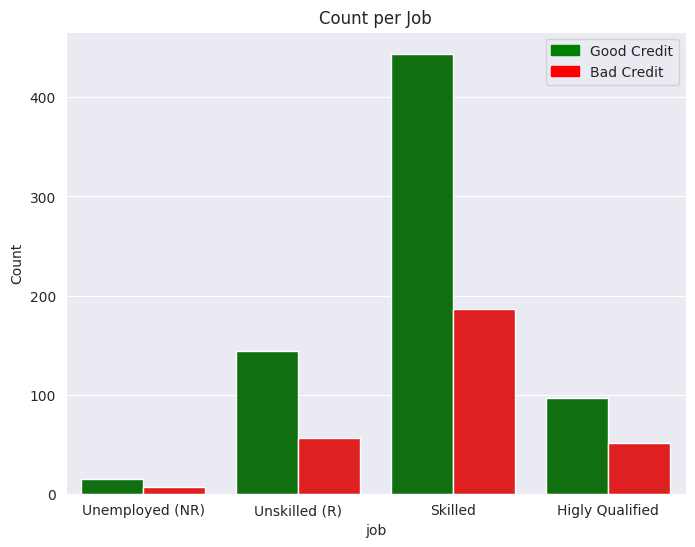

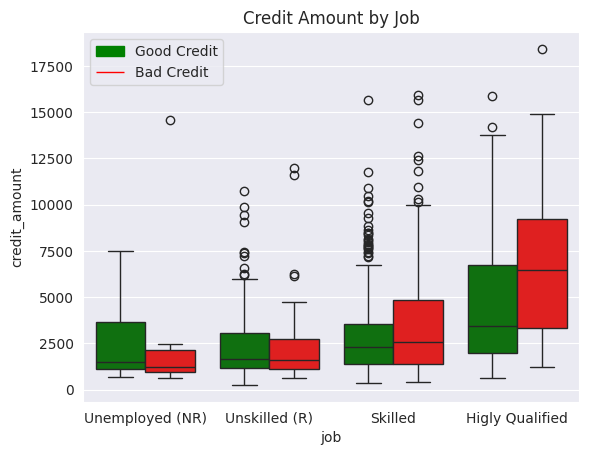

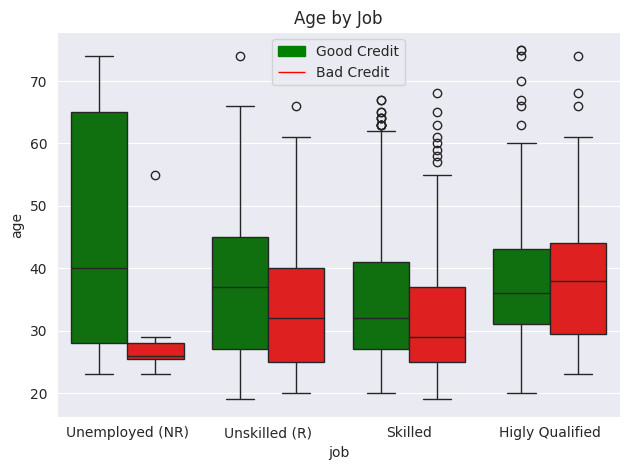

In [21]:
plt.figure(figsize=(8, 6))
ticks = ["Unemployed (NR)","Unskilled (R)","Skilled","Higly Qualified"]
sns.countplot(x="job",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3],ticks)
plt.title('Overall Count per Job')
plt.show()
plt.figure(figsize=(8, 6))
ticks = ["Unemployed (NR)","Unskilled (R)","Skilled","Higly Qualified"]
sns.countplot(x="job",data=df_encode, hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3],ticks)
plt.title('Count per Job')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Credit Amount by Savings Account
sns.boxplot(x="job", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3],ticks)
plt.title('Credit Amount by Job')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()

sns.boxplot(x="job", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3],ticks)
plt.title('Age by Job')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

# Employment Status

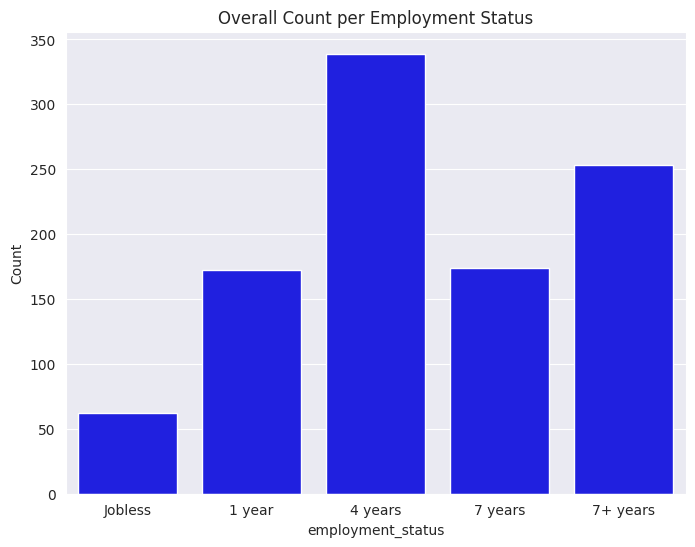

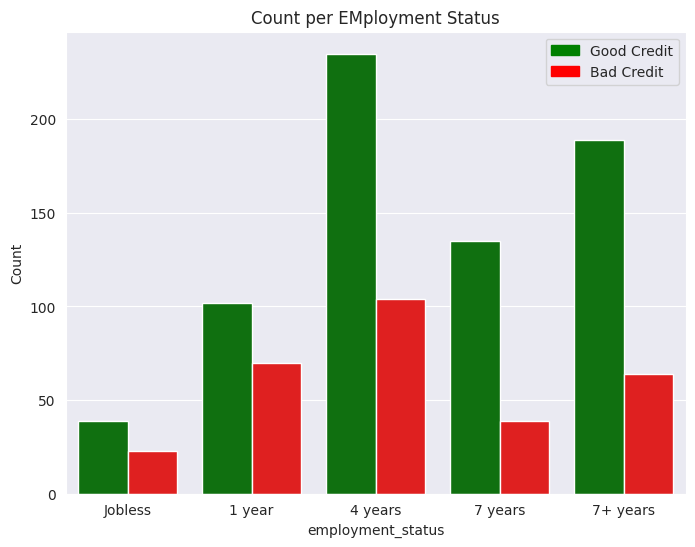

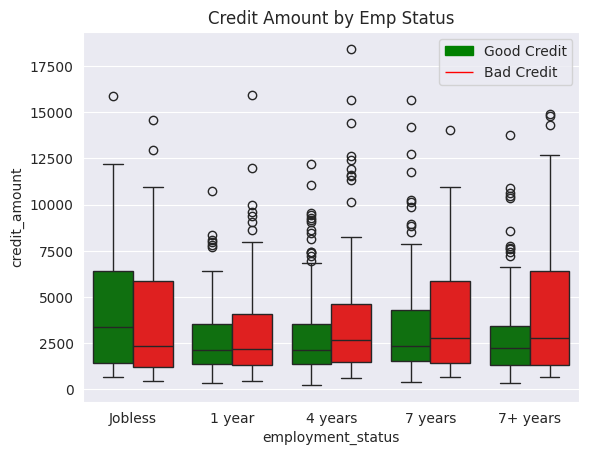

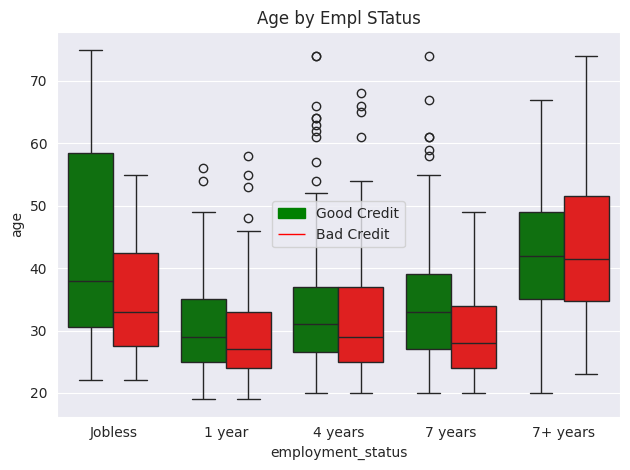

In [22]:
plt.figure(figsize=(8, 6))
ticks = ["Jobless","1 year","4 years","7 years", "7+ years"]
sns.countplot(x="employment_status",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Overall Count per Employment Status')
plt.show()
plt.figure(figsize=(8, 6))
ticks = ["Jobless","1 year","4 years","7 years", "7+ years"]
sns.countplot(x="employment_status",data=df_encode,hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Count per EMployment Status')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Credit Amount by Savings Account
sns.boxplot(x="employment_status", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Credit Amount by Emp Status')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()

sns.boxplot(x="employment_status", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Age by Empl STatus')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

# Credit History

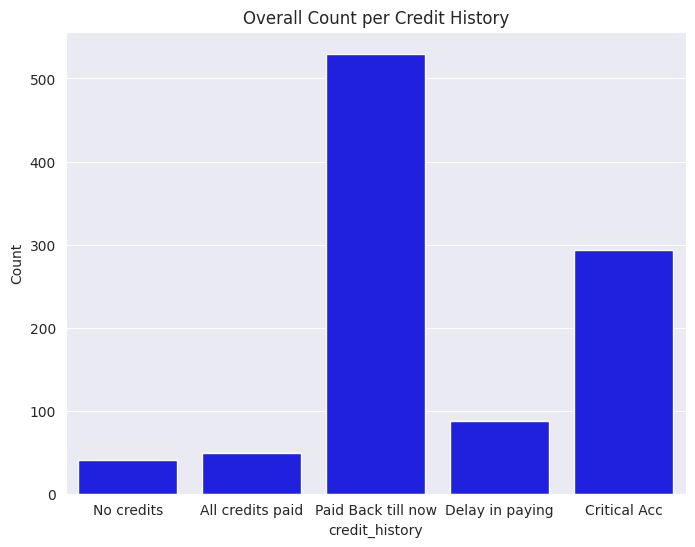

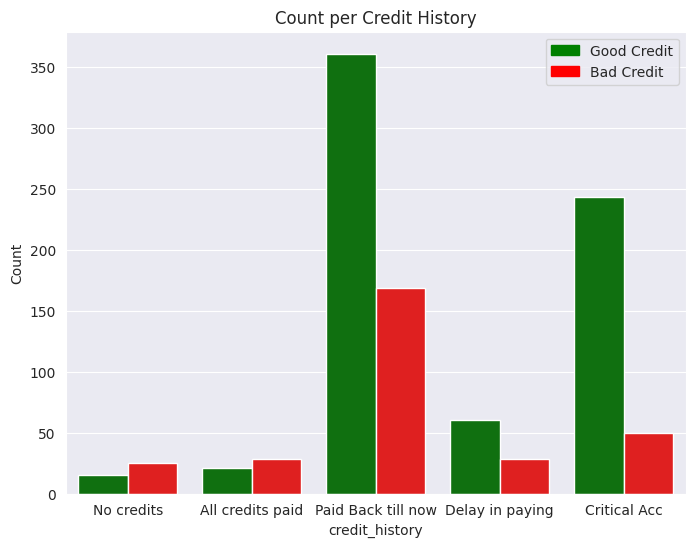

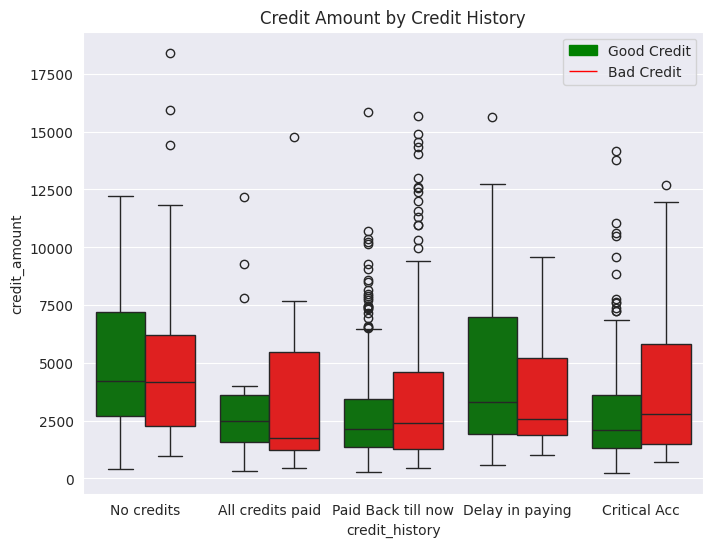

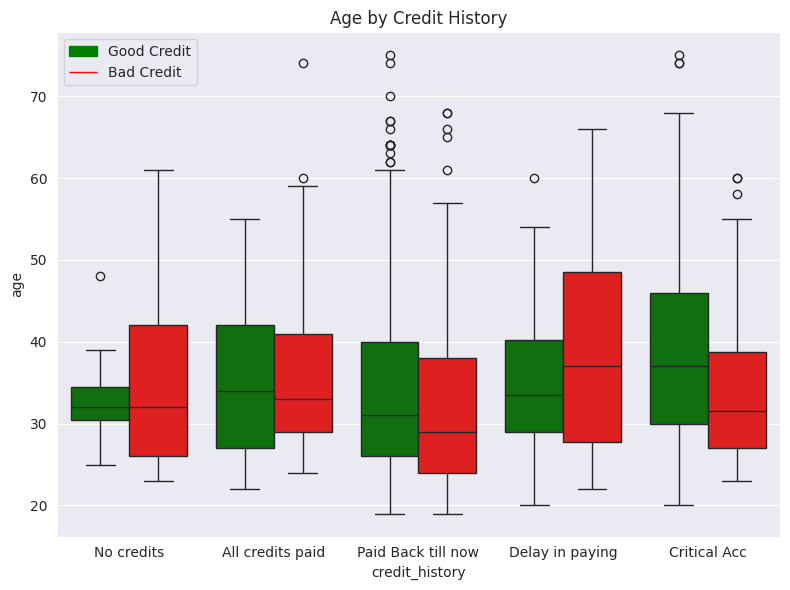

In [23]:
plt.figure(figsize=(8, 6))
ticks = ["No credits","All credits paid","Paid Back till now","Delay in paying", "Critical Acc"]
sns.countplot(x="credit_history",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Overall Count per Credit History')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x="credit_history",data=df_encode,hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3,4],ticks)
plt.title('Count per Credit History')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Credit Amount by Savings Account
plt.figure(figsize=(8, 6))
sns.boxplot(x="credit_history", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Credit Amount by Credit History')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x="credit_history", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3,4],ticks)
plt.title('Age by Credit History')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

# Purpose

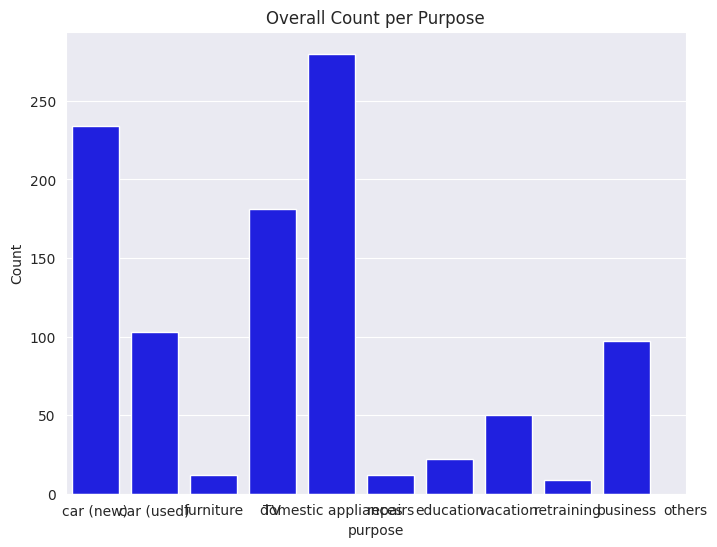

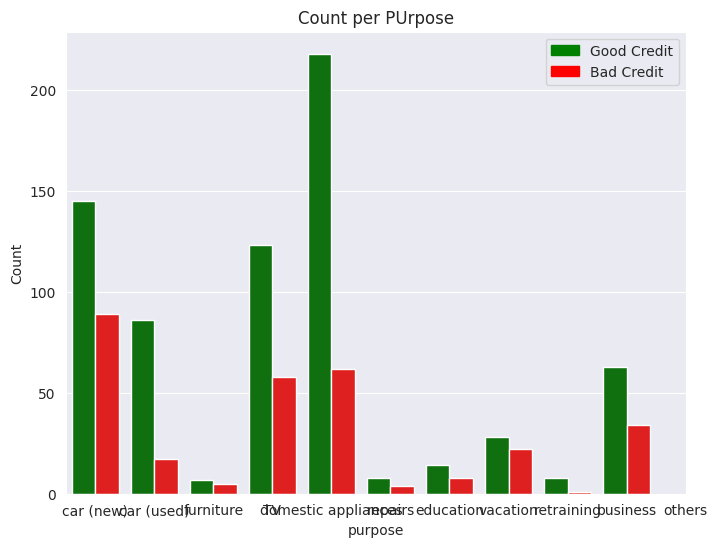

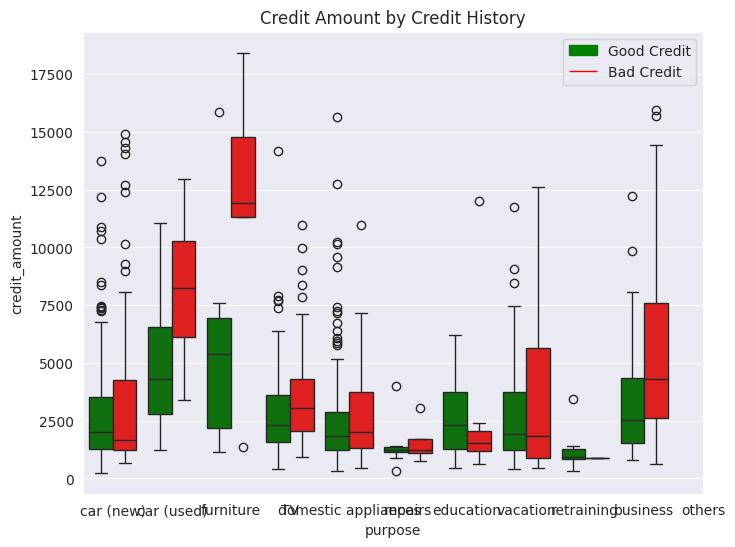

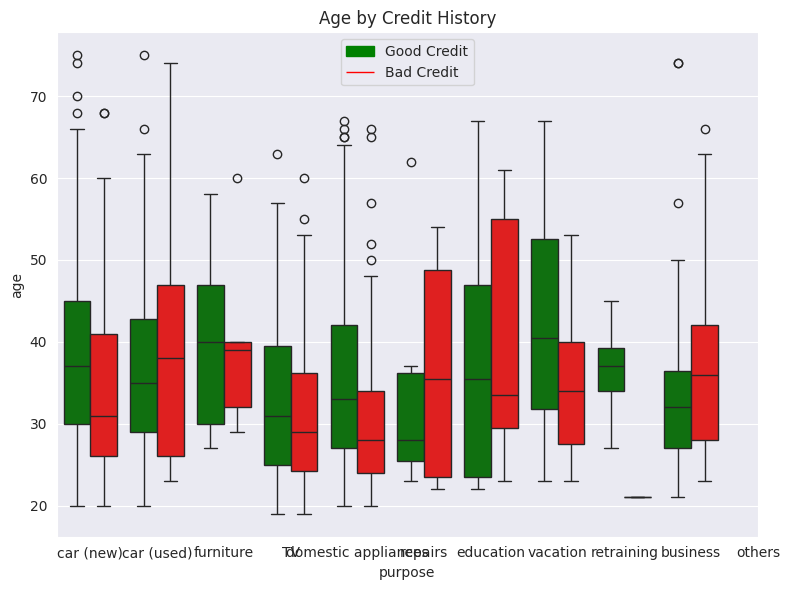

In [24]:
plt.figure(figsize=(8, 6))
ticks = ["car (new)","car (used)","furniture","TV", "domestic appliances", "repairs","education","vacation","retraining","business","others"]
sns.countplot(x="purpose",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],ticks)
plt.title('Overall Count per Purpose')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x="purpose",data=df_encode,hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],ticks)
plt.title('Count per PUrpose')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Credit Amount by Savings Account
plt.figure(figsize=(8, 6))
sns.boxplot(x="purpose", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],ticks)
plt.title('Credit Amount by Credit History')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x="purpose", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],ticks)
plt.title('Age by Credit History')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()

# HOusing

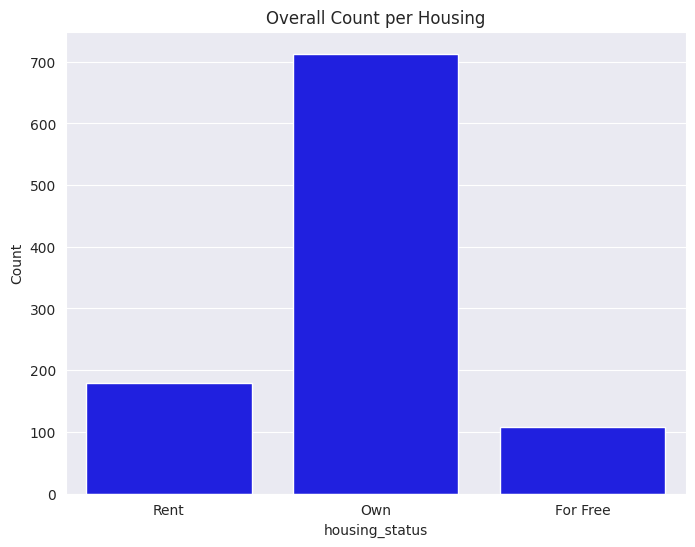

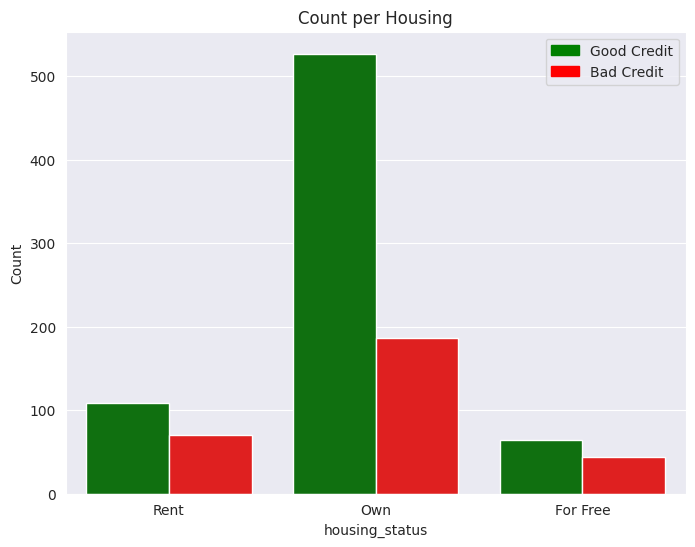

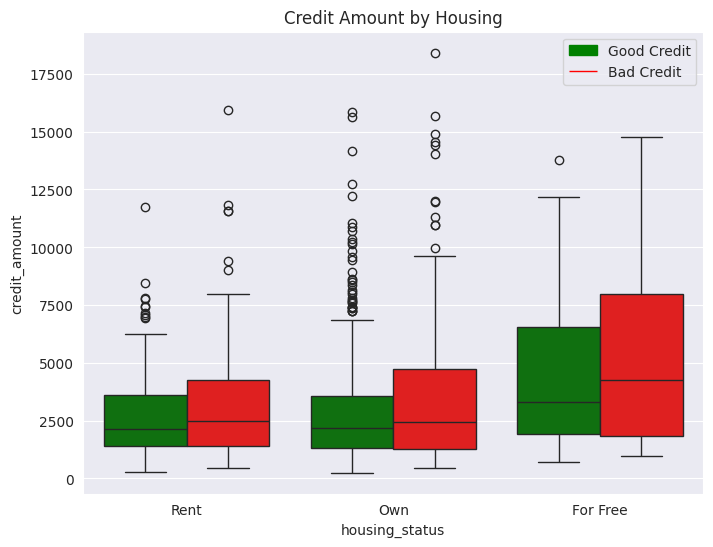

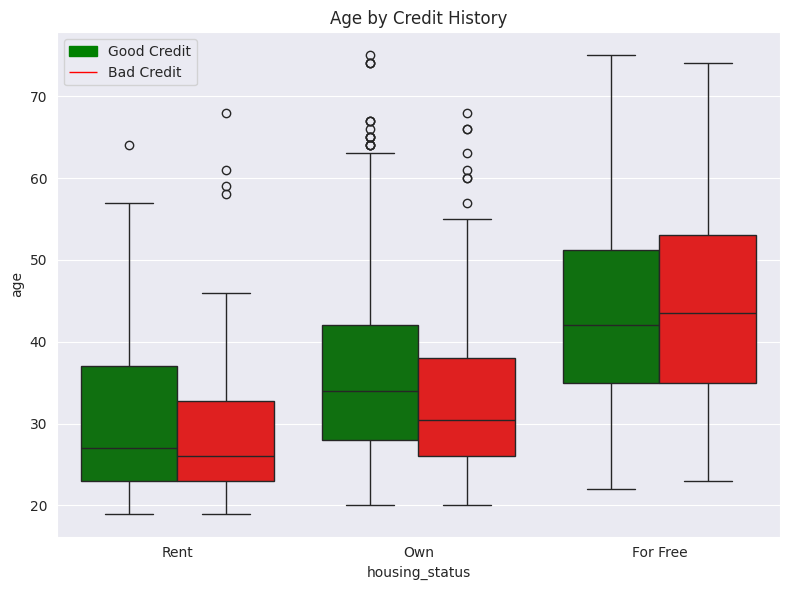

In [25]:
plt.figure(figsize=(8, 6))
ticks = ["Rent","Own","For Free"]
sns.countplot(x="housing_status",data=df_encode,palette=["blue"])
plt.ylabel("Count")
plt.xticks([0,1,2],ticks)
plt.title('Overall Count per Housing')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x="housing_status",data=df_encode,hue="result",palette=custom_palette)
plt.ylabel("Count")
plt.xticks([0,1,2],ticks)
plt.title('Count per Housing')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
# Create the boxplot for Credit Amount by Savings Account
plt.figure(figsize=(8, 6))
sns.boxplot(x="housing_status", y="credit_amount", data=df_encode, hue="result", palette=custom_palette)
plt.xticks([0,1,2],ticks)
plt.title('Credit Amount by Housing')
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x="housing_status", y="age", data=df_encode, hue="result",palette=custom_palette)
plt.xticks([0,1,2],ticks)
plt.title('Age by Credit History')

# Adjust the layout
plt.tight_layout()
custom_legend = plt.legend(labels=["Good Credit", "Bad Credit"])
custom_legend.legendHandles[0].set_color("green")
custom_legend.legendHandles[1].set_color("red")
# Show the plots
plt.show()